In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

sns.set(palette="summer")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a.zemerov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data loading

Yandex Geo Reviews is a russian-language dataset of reviews about organizations published on Yandex Maps.

* 500,000 unique reviews
* Only reviews about organizations in Russia
* Published from January to July 2023
* The dataset does not contain short one-word reviews
* Reviews have been cleared of personal data (phone numbers, email addresses)

In [2]:
data_path = "../data/geo-reviews-dataset-2023.tskv"

df = pd.read_csv(data_path, sep="\t", names=["address", "name_ru", "rating", "rubrics", "text"])

# Data preprocessing

In [3]:
df.isna().sum()

address      0
name_ru      0
rating       0
rubrics      0
text       970
dtype: int64

In [4]:
df = df.dropna()

In [5]:
for col_name in df.columns:
    df[col_name] = df[col_name].apply(lambda x: x.lstrip(f"{col_name}="))

In [6]:
df["rating"] = df["rating"].apply(lambda x: int(x.strip(".")))

**Data fields**

* Organization address (address)
* Organization name (name_ru)
* List of categories to which the organization belongs (rubrics)
* User rating from 0 to 5 (rating)
* Review text (text)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499030 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   address  499030 non-null  object
 1   name_ru  499030 non-null  object
 2   rating   499030 non-null  int64 
 3   rubrics  499030 non-null  object
 4   text     499030 non-null  object
dtypes: int64(1), object(4)
memory usage: 22.8+ MB


# EDA

## General overview

In [8]:
df.head()

,address,name_ru,rating,rubrics,text
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...


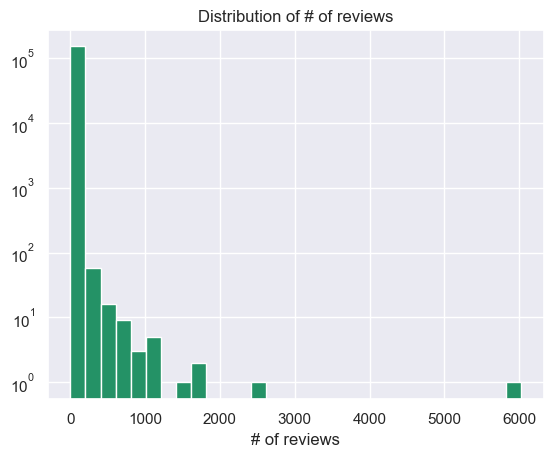

In [9]:
df["name_ru"].value_counts().hist(bins=30)

plt.title("Distribution of # of reviews")
plt.yscale("log")
plt.xlabel("# of reviews")
plt.show()

Filter companies with # of revies larger than `threshold`

In [10]:
threshold = 1000

companies = df["name_ru"].value_counts()
accepted_companies = set(companies[companies > threshold].index)
companies[companies > threshold]

Пятёрочка           6030
Магнит              2611
Красное&Белое       1732
Wildberries         1698
Ozon                1494
Вкусно — и точка    1181
Перекрёсток         1156
Fix Price           1112
Пляж                1091
СберБанк            1032
Name: name_ru, dtype: int64

In [11]:
df = df[df["name_ru"].apply(lambda x: x in accepted_companies)]

In [18]:
print(f"Total lines in df: {len(df)}")

Total lines in df: 19137


## Text statistics

In [12]:
df["#_words"] = df["text"].apply(lambda x: len(x.split()))
df["#_chars"] = df["text"].apply(len)

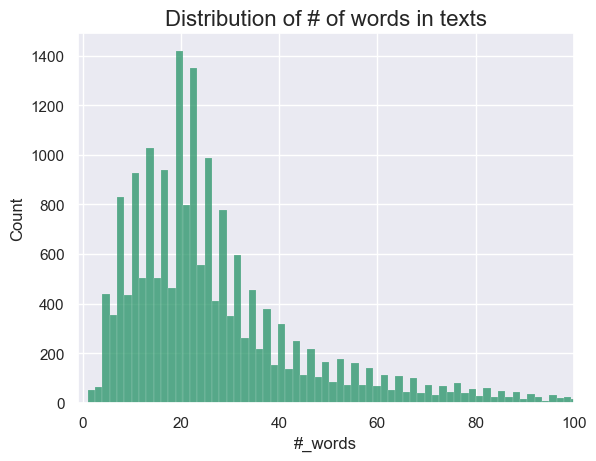

In [13]:
plt.title("Distribution of # of words in texts", fontsize=16)
sns.histplot(df, x="#_words")
plt.xlim((-1, 100))
plt.show()

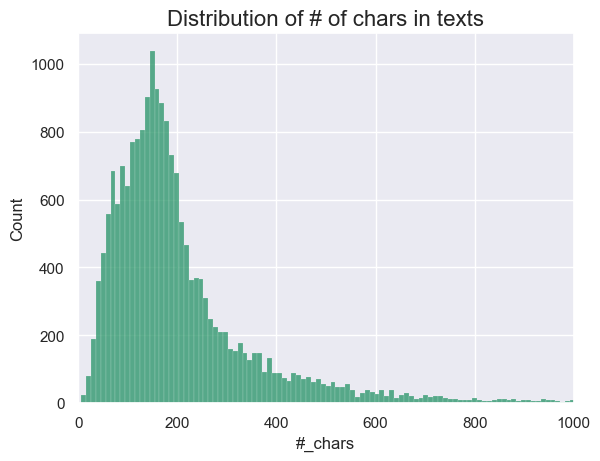

In [14]:
plt.title("Distribution of # of chars in texts", fontsize=16)
sns.histplot(df, x="#_chars")
plt.xlim((-1, 1000))
plt.show()

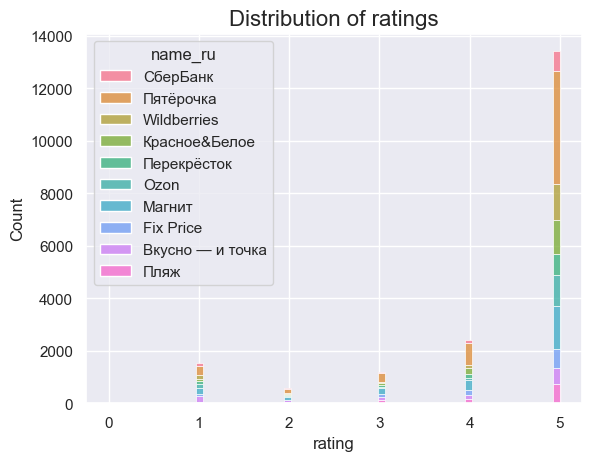

In [15]:
plt.title("Distribution of ratings", fontsize=16)
sns.histplot(df, x="rating", hue="name_ru", multiple="stack")
plt.show()

## WordCloud

In [16]:
stop_words = set(stopwords.words('russian'))

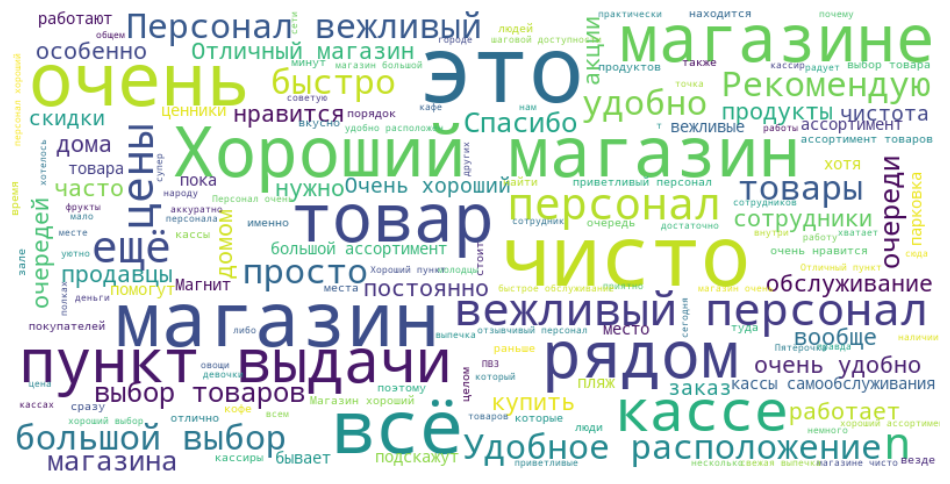

In [17]:
text = " ".join(df["text"]).replace("\n", " ")

wordcloud = WordCloud(
    max_font_size=40, 
    stopwords=stop_words,
    background_color="white",
    scale=2
).generate(text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()